## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [270]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris data that you worked on during the Topic exercises. 

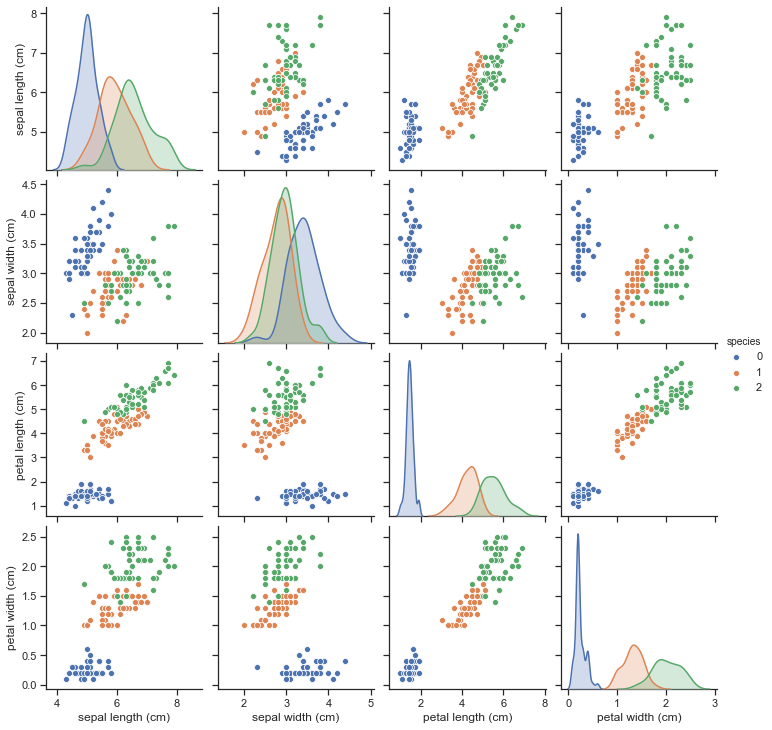

Your first task is to recreate a similar grid for the **Wine** data, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


## Graph Decision
Since the image data example will make the **wine** database seem small and not very illustrative, I choose to make two graphs to visualize the data, one with unified number for every row and column, and one with different measures for every subplot


### Ploting function for the 1st graph ( different measures for every subplot)


In [271]:
# define plotting function
def myplotGrid(X,y,feat):
    import seaborn as sns
    df = pd.DataFrame(X,columns=feat)
    df['target'] = y
    sns.pairplot(df,hue='target',palette = 'deep')        

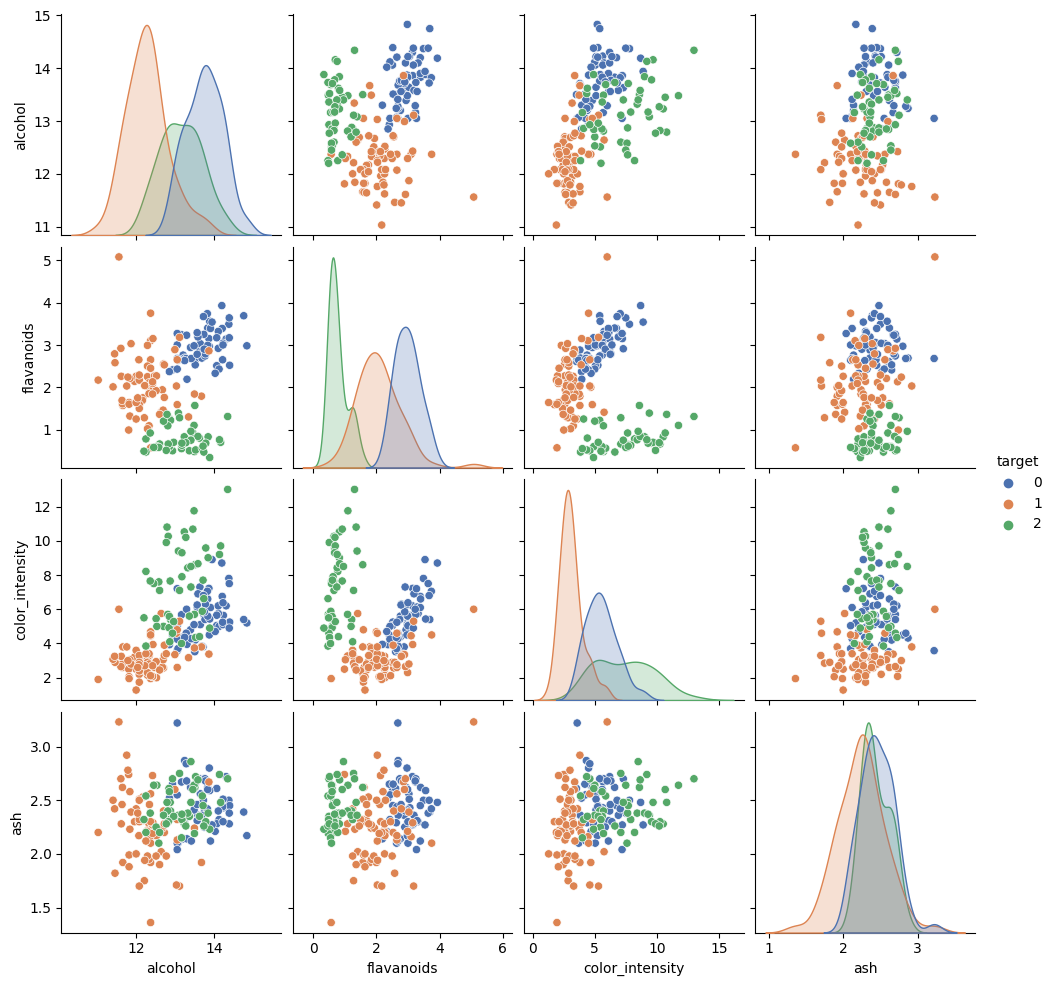

In [272]:
# run the plotting function
myplotGrid(X,y,selected_features )

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid2(XN,y)

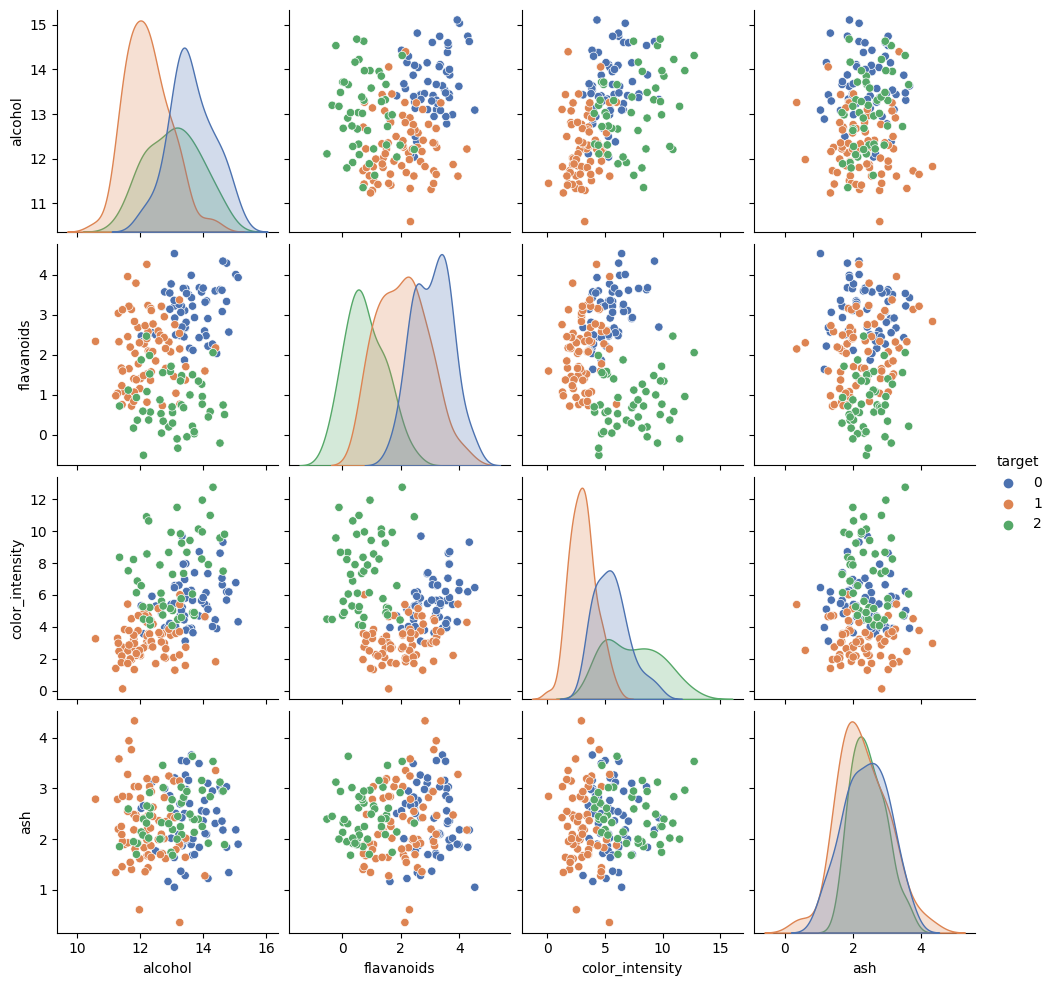

In [273]:

# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)

#Invoking Myplot with noise 
myplotGrid(XN,y,selected_features)



### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 



**Answer:**

Based on the exploratory analysis, I would choose alcohol and flavanoids, since the are the most visually distinct in the pairplots, both are significants factors for the wine, and because these two are not corelleated, both provide complementary information. 



### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


**Answer:**

The noise data has more scattered points and the wines classes are more difficult to distinguish one from anothe. Meaning incorrect information for the model. 
    

## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [274]:
# helper code
# helper code
import math

#Manhattan Distance Function
def manhattanDist(vec1,vec2):
    """
    Calculate the Manhattan distance between two vectors.

    Parameters:
    - vec1: The first vector array.
    - vec2: The second vector array.

    Returns:
    The Manhattan distance between the two vectors.
    """
    d = 0.0
    for v1, v2 in zip(vec1, vec2):
        d += abs(v1 - v2)
    return d


#Euclidian Distance function
def euclidianDist(vec1,vec2):
    """
    Calculate the Euclidean distance between two vectors.

    Parameters:
    - vec1: The first vector array.
    - vec2: The second vector array.

    Returns:
    The Euclidean distance.
    """
    squared_diff_sum = 0.0
    for v1, v2 in zip(vec1, vec2):
        squared_diff_sum += (v1 - v2) ** 2
    euclidean_distance = math.sqrt(squared_diff_sum)
    return euclidean_distance


def nearNeighbors(tData, y, test, N, distAlgo):
    """
    Finds the N nearest neighbors using the provided distance algorithm
    and returns them as a list.
    
    Inputs:
    - tData: Training data.
    - y: target for training data .
    - test: The row element used as a reference to find the nearest neighbors.
    - N: The number of nearest neighbors to find.
    - distAlgo: The distance algorithm used for calculating the distance between neighbors.
    
    Output:
    Returns a list of N nearest neighbors to the test element.
    """
    distances = []
    for i, tData_row in enumerate(tData):
        d = distAlgo(test, tData_row)
        tData_row_with_target = tData_row + [y[i]]
        distances.append((tData_row_with_target, d))
    distances.sort(key=lambda x: x[1])
    neighbors = [distance[0] for distance in distances[:N]]
    return neighbors

def predict(tData, test, y, N, distAlgo):
    """
    Predicts the class label for the given test values using the k-nearest neighbors approach.
    
    Inputs:
    - tData: Training data.
    - y: List of target values for the training data.
    - test: The row element used for comparison to find the nearest neighbors.
    - N: The number of nearest neighbors to consider.
    - distAlgo: The distance algorithm to be used for calculating the distance.
    
    Output:
    Returns the pred label for the class of the testing data.
    """
    neighbors = nearNeighbors(tData, y, test, N, distAlgo)
    class_labels = [row[-1] for row in neighbors]
    label_counts = {}
    for label in class_labels:
        label_counts[label] = label_counts.get(label, 0) + 1
    prediction = max(label_counts, key=label_counts.get)
    return prediction



In [275]:
# mykNN code

# mykNN code
def mykNN(X, y, X_, N, distAlgo):
    """
    Train a model to classify and predict labels for a new sample of data using the k-nearest neighbor algorithm.
    
    Parameters:
    - X: The training data used to build the model.
    - y: The class labels associated with the training data.
    - X_: The data to be classified.
    - N: The number of neighbors to consider in the classification process.
    - distAlgo: The distance algorithm used to calculate the distance between neighbors.
    
    Returns:
    A list of pred labels for the testing data.
    """
    tData = X.tolist() if isinstance(X, np.ndarray) else X
    predictions = []
    
    # Generate the list of predicted labels for the new sample data
    for test_instance in X_:
        prediction = predict(tData, test_instance, y, N, distAlgo)
        predictions.append(prediction)
    
    return predictions


In [276]:
#Testing and setting the databases for trial 
# Define the features of the dataset
dataset = np.array([
    [13.77, 2.79, 6.3, 2.68],
    [13.74, 2.9,  5.85, 2.25],
    [13.56, 2.78, 6.25, 2.46],
    [14.22, 3.,   6.38, 2.3],
    [13.29, 3.23, 6.,   2.68],
    [13.72, 3.67, 6.8,  2.5],
    [12.37, 0.57, 1.95, 1.36],
    [12.33, 1.09, 3.27, 2.28],
    [12.64, 1.41, 5.75, 2.02],
    [13.67, 1.79, 3.8,  1.92],
    [12.37, 3.1,  4.45,  2.16],
    [12.17, 1.75, 2.95, 2.53]
])

# Define the target labels for the dataset
target = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Define the test dataset
dataset2 = np.array([
    [14.1,  2.92,  6.2, 2.4],
    [13.94, 3.54, 8.9, 2.27],
    [13.05, 3.27, 7.2, 2.04],
    [13.83, 2.99, 5.6, 2.6],
    [13.82, 3.74, 7.05, 2.42],
    [12.37, 2.65, 4.6,  2.56],
    [13.11, 3.18, 5.3,  1.7],
    [12.37, 2.,   4.68, 1.92],
    [13.34, 1.3,  3.17, 2.36],
    [12.21, 1.28, 2.85, 1.75]
])

# Define the target labels for the test dataset
target2 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Call the mykNN function with the given datasets and distance functions
y_ = mykNN(dataset, target, dataset2, 3, euclidianDist)
y_2 = mykNN(dataset, target, dataset2, 3, manhattanDist)

# Printing the data from the Euclidean function 
print("\nthe data from the Euclidean function :")
print(y_)

# Printing the data from the Manhattan function 
print("\nthe data from the Manhattan function:")
print(y_2)



the data from the Euclidean function :
[0, 0, 0, 0, 0, 1, 0, 1, 1, 1]

the data from the Manhattan function:
[0, 0, 0, 0, 0, 1, 0, 1, 1, 1]


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


### Matrix functions  

In [277]:
# confusion matrix, accuracy, precision, recall, etc. 

def confusionMatrix(actual, pred, classLabel):
    """
    Generate a matrix from the manhattan/ Euclidean and actual class labels for the kNN algorithm.

    Parameters:
    class Labels list
    class Labels targets
    matrix class label shape 

    Returns:
    A matrix where  rows/columns are represented by  the manhattan/ Euclidean and actual data
    """
    matrixshape=len(classLabel)
    matrix = np.zeros((matrixshape,matrixshape))
    for i in range(len(actual)):
        matrix[actual[i]][pred[i]] += 1
    return matrix

#builds a 4x4 confusion matrix with the ros and columns totaled

def confusionMatrixTotal(actual, pred, classLabel):
    """
    Generate a matrix with totaled rows and columns from the predicted and actual class labels,
    allowing evaluation of the effectiveness of the kNN algorithm.

    Parameters:
    class Labels list
    class Labels targets
    matrix class label shape 

    Returns:
    The resulting matrix is structured such that the rows correspond to the pred data and the columns correspond to the actual data.
    """
    uniqueLabels = set(classLabel)  # Get unique class labels
    numClasses = len(uniqueLabels)
    labelToIndex = {label: i for i, label in enumerate(uniqueLabels)}

    matrix = np.zeros((numClasses + 1, numClasses + 1))

    # Fill the matrix with the counts of predicted and actual labels
    for trueLabel, predLabel in zip(actual, pred):
        if trueLabel not in labelToIndex or predLabel not in labelToIndex:
            raise ValueError("Class label not found in classLabel list")

        trueIndex = labelToIndex[trueLabel]
        predIndex = labelToIndex[predLabel]
        matrix[trueIndex, predIndex] += 1

    # Compute row and column totals
    matrix[:-1, -1] = np.sum(matrix[:-1, :-1], axis=1)  # Row totals
    matrix[-1, :-1] = np.sum(matrix[:-1, :-1], axis=0)  # Column totals

    return matrix

import seaborn as sns

def deployMatrix(cm):
    """
    Generate a visual heat map of the provided confusion matrix with graph labels.

    Parameters:
    - cm: A 3x3 or 4x4 confusion matrix.

    Output:
    Displays a heatmap of the confusion matrix.
    """

    labels1 = ['class0', 'class1', 'class2']
    labels2 = ['class0', 'class1', 'class2', 'total']

    # Determine the labels based on the matrix size
    if cm.shape[0] == 4:
        labels = labels2
    else:
        labels = labels1

    # Ploting
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()




### Evaluation Measures functions

In [278]:

def accuracy(actual, pred):
    """
    accuracy function

    Input:
    class Labels list
    class Labels targets

    Output:
    Returns the calculated accuracy as a decimal number.
    """
    correct = sum(1 for a, p in zip(actual, pred) if a == p)
    return  (correct / len(actual)) 
    

    
def precision(cm):
    """
    Presicion function

    Input:
    - cm: A 2D array or matrix representing the confusion matrix.

    Output:
    Returns a list of precision values, one for each class label.
    """
    num_classes = cm.shape[0]
    precision_values = []
    
    for i in range(num_classes):
        true_positives = cm[i, i]
        total_predicted_positives = np.sum(cm[:, i])
        
        precision = true_positives / total_predicted_positives
        precision_values.append(precision)
    
    return precision_values

def recall(cm):
    """
    recall function

    Input:
    - cm: A 2D array or matrix representing the confusion matrix.

    Output:
    Returns a list of recall values, one for each class label.
    """
    num_classes = cm.shape[0]
    recall_values = []
    
    for i in range(num_classes):
        true_positives = cm[i, i]
        total_actual_positives = np.sum(cm[i, :])
        
        recall = true_positives / total_actual_positives
        recall_values.append(recall)
    
    return recall_values



def f1Score(precision, recall):
    """
    f1Score function
    Input:
    - precision: A list of precision values.
    - recall: A list of recall values.

    Output:
    Returns a list of F1 scores, one for each class label.
    """
    f1 = [2 * ((p * r) / (p + r)) for p, r in zip(precision, recall)]
    return f1



### Model evaluation and validation functions 

In [290]:

def crossValidation(data, target, nFolds, seed):
    """
    Divide the provided lists of data and targets into nFolds number of sublists
    
    Input:
    data: The list of data to be divided
    targets: The list of targets to be divided
    nFolds: The number of sublists to create
    seed: A stabilizing value for consistent results
    
    Output:
    Returns two lists, each containing nFold sublists of the provided data
    """
    # Set the seed value to ensure reproducibility of the split
    np.random.seed(seed)
    Splitdata = list()
    splitTarget = list()
    cpoyData = list(data)
    copyTarget = list(target)
    # Determine the size of each sublist based on the number of folds
    Sfold = int(len(data) / nFolds)
    for _ in range(nFolds):
        firstFold = list()
        secFold = list()
        while len(firstFold) < Sfold:
            # Randomly select an index from the remaining data
            index = np.random.randint(len(cpoyData))
            firstFold.append(cpoyData.pop(index))
            secFold.append(copyTarget.pop(index))
        Splitdata.append(firstFold)
        splitTarget.append(secFold)   
    return Splitdata, splitTarget


def evaPerformance(dataset, target, algorithm, nFolds, N, distAlgo, matrixAlgo, seed):
    """
    Assess the performance of the kNN algorithm and obtain performance metrics
    
    Input:
    dataset: The training dataset
    target: The target dataset
    algorithm: The algorithm used to build the model
    nFolds: The number of folds for model construction
    N: The number of nearest neighbors to utilize
    distAlgo: The distance algorithm to employ
    matrixAlgo: The matrix algorithm to utilize
    seed: A stability factor for reproducible output
    
    Output:
    Returns a list of lists representing performance metrics: confusion matrix, accuracy, precision, and F1 scores
    """
    if isinstance(dataset, np.ndarray):
        dataset = dataset.tolist() 
    folds = crossValidation(dataset, target, nFolds, seed)
    F1S = list()

    matrix = list()

    pricisionScores = list()

    accuracyScores = list()

    # Select the data for training the model and testing the model
    for Xfold, YFold in zip(folds[0], folds[1]):
        sTrain = list(folds[0])
        targetT = list(folds[1])
        sTrain.remove(Xfold)
        targetT.remove(YFold)
        sTrain = sum(sTrain, [])
        targetT = sum(targetT, [])
        sTest = list()
        Testing_target = list()
        for Xrox, YRow in zip(Xfold, YFold):
            cXrox = list(Xrox)
            sTest.append(cXrox)
            Testing_target.append(YRow)
        # Apply the kNN algorithm here
        pred = algorithm(sTrain, targetT, sTest, N, distAlgo)
        accuracys = accuracy(Testing_target, pred)
        cm = matrixAlgo(Testing_target, pred, wine.target_names)
        pricision = precision(cm)
        recalling = recall(cm)
        accuracyScores.append(accuracys)
        matrix.append(cm)
        pricisionScores.append(precision(cm))
        F1S.append(f1Score(pricision, recalling))
    return matrix, accuracyScores, pricisionScores, F1S



 ==================== Euclidean Distance ====================


 ============================== Fold 1 ==============================


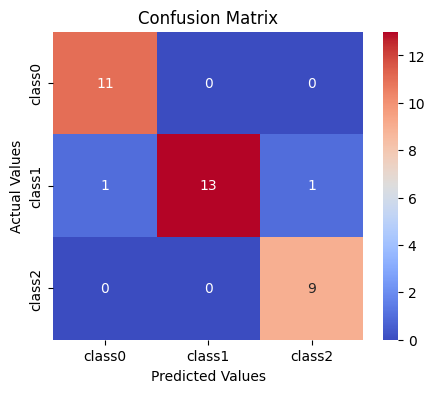

Accuracy: 0.942857
Precision: [0.9166666666666666, 1.0, 0.9]
F1 Scores: [0.9565217391304348, 0.9285714285714286, 0.9473684210526316]


 ============================== Fold 2 ==============================


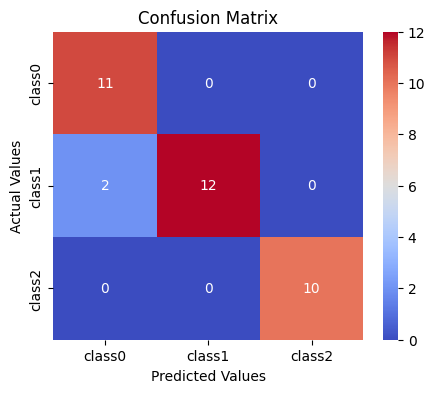

Accuracy: 0.942857
Precision: [0.8461538461538461, 1.0, 1.0]
F1 Scores: [0.9166666666666666, 0.923076923076923, 1.0]


 ============================== Fold 3 ==============================


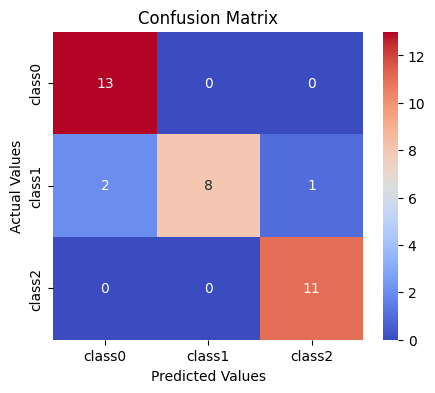

Accuracy: 0.914286
Precision: [0.8666666666666667, 1.0, 0.9166666666666666]
F1 Scores: [0.9285714285714286, 0.8421052631578948, 0.9565217391304348]


 ============================== Fold 4 ==============================


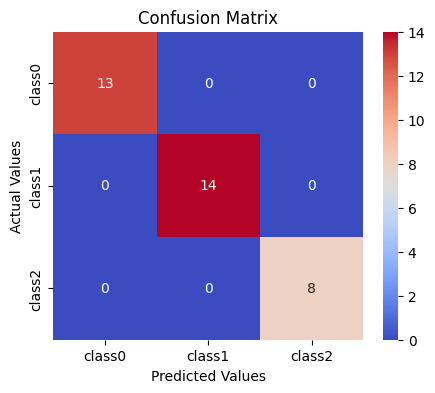

Accuracy: 1.000000
Precision: [1.0, 1.0, 1.0]
F1 Scores: [1.0, 1.0, 1.0]


 ============================== Fold 5 ==============================


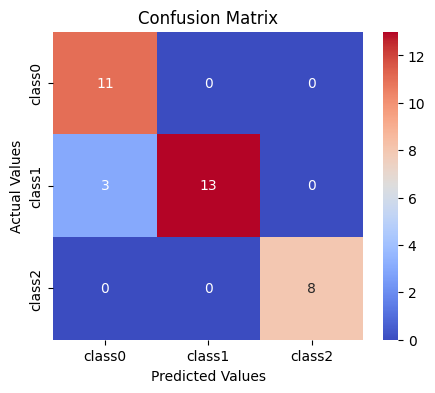

Accuracy: 0.914286
Precision: [0.7857142857142857, 1.0, 1.0]
F1 Scores: [0.88, 0.896551724137931, 1.0]


In [291]:
# Test the evaluation code using the Euclidean distance metric
print(" ==================== Euclidean Distance ====================")
# Evaluate the algorithm using the provided data and settings
e = evaPerformance(X, y, mykNN, 5, 5, euclidianDist, confusionMatrix, mySeed)
# Iterate over the folds and print the results
for i in range(len(e[0])):
    # Determine the current fold number
    folds = i + 1
    print("\n\n ============================== Fold %i ==============================" % folds)
    # Display the confusion matrix
    deployMatrix(e[0][i])
    # Print the accuracy
    print("Accuracy: %f" % e[1][i])
    # Print the precision values
    print("Precision: %s" % e[2][i])
    # Print the F1 scores
    print("F1 Scores: %s" % e[3][i])






============================== Manhattan Function  ============================== 


============================== Fold 1 ==============================


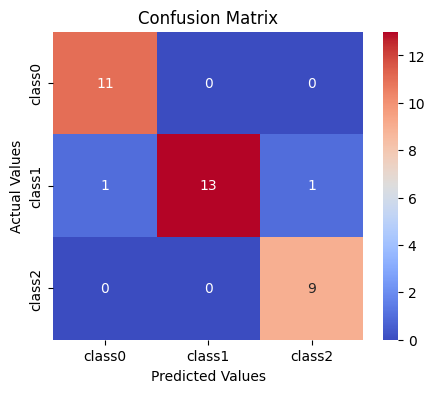

Accuracy: 0.942857
Precision: [0.9166666666666666, 1.0, 0.9]
F1 Scores: [0.9565217391304348, 0.9285714285714286, 0.9473684210526316]


============================== Fold 2 ==============================


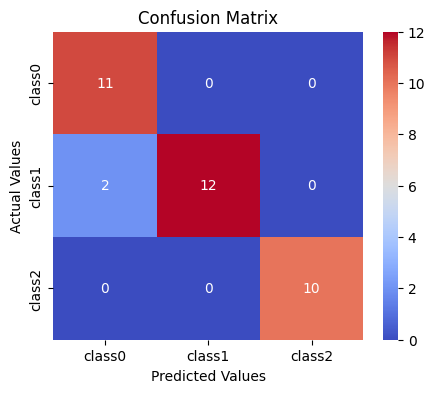

Accuracy: 0.942857
Precision: [0.8461538461538461, 1.0, 1.0]
F1 Scores: [0.9166666666666666, 0.923076923076923, 1.0]


============================== Fold 3 ==============================


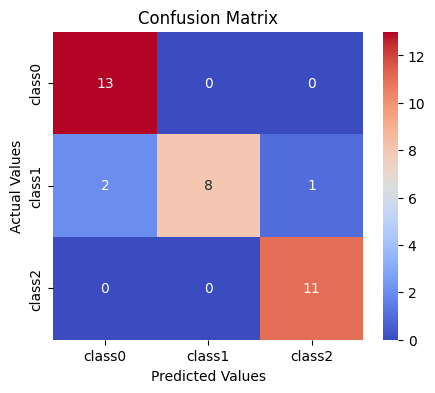

Accuracy: 0.914286
Precision: [0.8666666666666667, 1.0, 0.9166666666666666]
F1 Scores: [0.9285714285714286, 0.8421052631578948, 0.9565217391304348]


============================== Fold 4 ==============================


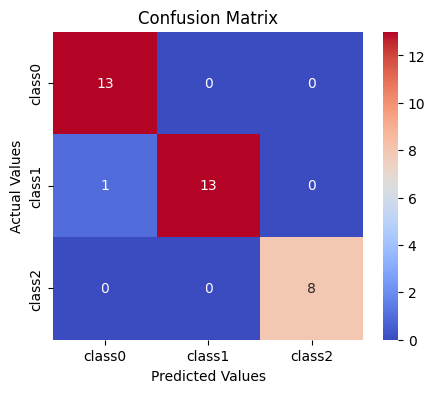

Accuracy: 0.971429
Precision: [0.9285714285714286, 1.0, 1.0]
F1 Scores: [0.962962962962963, 0.962962962962963, 1.0]


============================== Fold 5 ==============================


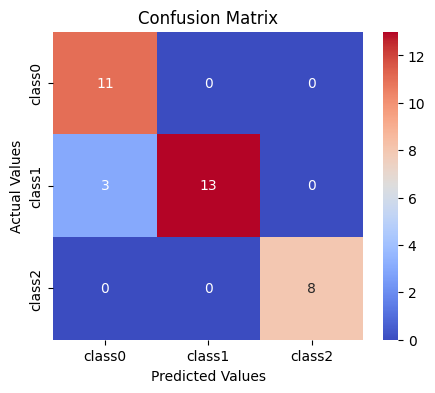

Accuracy: 0.914286
Precision: [0.7857142857142857, 1.0, 1.0]
F1 Scores: [0.88, 0.896551724137931, 1.0]


In [292]:
print("\n\n============================== Manhattan Function  ============================== ")
e = evaPerformance(X,y,mykNN,5,5,manhattanDist,confusionMatrix, mySeed)
for i in range(len(e[0])):
    folds = i+1
    print("\n\n============================== Fold %i ==============================" % folds)
    deployMatrix(e[0][i])
    print("Accuracy: %f" % e[1][i])
    print("Precision: %s" % e[2][i] )
    print("F1 Scores: %s" % e[3][i])




## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    Clean_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [293]:
def evaNestedPerformance(dataset, target, algorithm, nFolds, N, distAlgo, seed):
    """
    Evaluates the performance of the nested kNN algorithm and returns the performance metrics
    to be used in determining the best hyperparameters
    
    Input:
    target: The target dataset
    algorithm: the biulding algo
    nFolds: the total folds of the model
    N: the total of near neighbors
    distAlgo: algo of distance
    
    Output:
    Returns the accuracy in the folds 
    """
    if isinstance(dataset, np.ndarray):
        dataset = dataset.tolist() 
    
    np.random.seed(seed)
    accuracyScores = []
    
    for _ in range(nFolds):
        Splitdata, splitTarget = crossValidation(dataset, target, nFolds, seed)
        sTrain = sum(Splitdata[:nFolds-1], [])
        targetT = sum(splitTarget[:nFolds-1], [])
        sTest = Splitdata[nFolds-1]
        Testing_target = splitTarget[nFolds-1]
        
        pred = algorithm(sTrain, targetT, sTest, N, distAlgo)
        accuracys = accuracy(Testing_target, pred)
        accuracyScores.append(accuracys)
    
    accuracyAvg = (sum(accuracyScores) / len(accuracyScores)) * 100

    return accuracyAvg


In [294]:
# evaluate clean data code
# myNestedCrossVal code
def myNestedCrossVal(X,y,nFolds,N,distAlgo,matrixAlgo,seed):
    """
    Evaluates the performance of the kNN algorithim and 
    hyper parameters with a nested validation operation
    inorder to optimise the returned performance metrics
    
    Input:
    X = The training data
    y = The target dataset
    nFolds = The number of folds for the model to be built off of
    N = The number of nearest neighbours to use
    distAlgo = The distance algorithim to use
    matrixAlgo = The matrix algorithim to use
    seed = A stabilising variable for repeatability of the output
    
    Output:
    returns a list of lists of performance metrics: confusion matrix, accuracy, precision, and F1 scores
    """
    if(isinstance(X,np.ndarray)):
        X = X.tolist() 
    folds = crossValidation(X, y, nFolds,seed)
    accuracyScores = list()
    matrix = list()
    pricisionScores = list()
    F1S = list()
    foldCount = 1
    #selects the data to be used to train the model and the data to be used in testing the model
    for Xfold,YFold in zip(folds[0],folds[1]):
        dist=0
        k=0
        sTrain = list(folds[0])
        targetT = list(folds[1])
        sTrain.remove(Xfold)
        targetT.remove(YFold)
        sTrain = sum(sTrain, [])
        targetT = sum(targetT, [])
        accuracyVal = 0
        k=0
        
        #the nested crossvalidation for validating the model
        print("Valadating Fold %i" % foldCount)
        for i in range(len(N)):
            for j in range(len(distAlgo)):
                val = evaNestedPerformance(sTrain, targetT, mykNN, nFolds, N[i], distAlgo[j], seed)
                print('Accuracy: %.3f%%' % val + ' K = %i'% N[i] + ' Distance Function: %s' % distAlgo[j])
                if(val >= accuracyVal):
                    accuracyVal = val
                    k =N[i]
                    dist = distAlgo[j]
        print("\nThe Best parameters of this run are:")
        print('Distance is:  %s' % dist)
        print('Accuracy is %.3f%%' % accuracyVal + '  k = %i' % k)

        print("\n")
        
        sTest = list()
        Testing_target = list()
        for Xrox,YRow in zip(Xfold,YFold):
            cXrox = list(Xrox)
            sTest.append(cXrox)
            Testing_target.append(YRow)
        #The kNN algorithem is applied here
        pred = mykNN(sTrain, targetT, sTest, k, dist)
        cm = matrixAlgo(Testing_target, pred, wine.target_names)
        accuracys = accuracy(Testing_target, pred)
        pricision = precision(cm)
        recalling = recall(cm)
        print('Fold %i' % foldCount +' Confusion Matrix: \n%s\n' % cm)
        matrix.append(cm)
        accuracyScores.append(accuracys)
        pricisionScores.append(precision(cm))
        F1S.append(f1Score(pricision,recalling))
        foldCount += 1
    return matrix,accuracyScores, pricisionScores,F1S


In [295]:
# Data clean Evaluation  

Clean_fold = myNestedCrossVal(X,y,5,list(range(1,11)),[euclidianDist,manhattanDist],confusionMatrix, 12345)

Valadating Fold 1
Accuracy: 82.143% K = 1 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 89.286% K = 1 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 82.143% K = 2 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 89.286% K = 2 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 89.286% K = 3 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 92.857% K = 3 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 85.714% K = 4 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 89.286% K = 4 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 89.286% K = 5 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 92.857% K = 5 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 89.286% K = 6 Distance Function: <function euclidianDist at 0x000001F591

**Average Confusion Matrix for Clean Data**


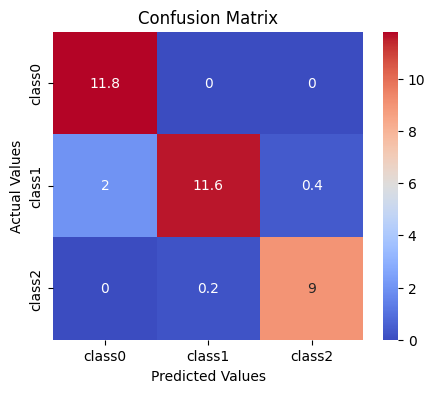

Accuracy for fold 1: 0.9143
Accuracy for fold 2: 0.9143
Accuracy for fold 3: 0.9143
Accuracy for fold 4: 0.9714
Accuracy for fold 5: 0.9143
The average Accuracy is 0.9257


In [296]:
# Print the summaries
# Calculate the average confusion matrix
average_cm = sum(Clean_fold[0]) / len(Clean_fold[0])

# Display the average confusion matrix
print("**Average Confusion Matrix for Clean Data**")
deployMatrix(average_cm)

# Print accuracies for each fold
for i in range(len(Clean_fold[1])):
    fold_number = i + 1
    accuracy_decimal = Clean_fold[1][i]
    print("Accuracy for fold %i: %.4f" % (fold_number, accuracy_decimal))

# Calculate and print the average accuracy
average_accuracy = sum(Clean_fold[1]) / len(Clean_fold[1])
print("The average Accuracy is %.4f" % average_accuracy)




In [297]:
# Noise Data clean Evaluation  
Noise_fold =  myNestedCrossVal(XN,y,5,list(range(1,11)),[euclidianDist,manhattanDist],confusionMatrix,mySeed)

Valadating Fold 1
Accuracy: 75.000% K = 1 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 75.000% K = 1 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 75.000% K = 2 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 75.000% K = 2 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 75.000% K = 3 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 75.000% K = 3 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 75.000% K = 4 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 75.000% K = 4 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 78.571% K = 5 Distance Function: <function euclidianDist at 0x000001F59148F1A0>
Accuracy: 75.000% K = 5 Distance Function: <function manhattanDist at 0x000001F58F514B80>
Accuracy: 78.571% K = 6 Distance Function: <function euclidianDist at 0x000001F591

**Average Confusion Matrix for Data with Noise**


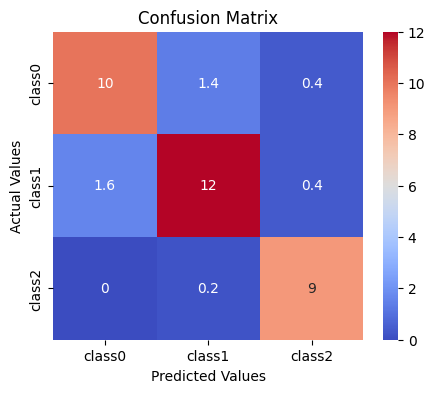

Accuracy for fold 1: 0.8286
Accuracy for fold 2: 0.8857
Accuracy for fold 3: 0.9429
Accuracy for fold 4: 0.9143
Accuracy for fold 5: 0.8571
The average Accuracy is 0.8857


In [298]:
# Calculate the average confusion matrix for data with noise
average_cm_noise = sum(Noise_fold[0]) / len(Noise_fold[0])

# Display the average confusion matrix
print("**Average Confusion Matrix for Data with Noise**")
deployMatrix(average_cm_noise)

# Print accuracies for each fold
for i in range(len(Noise_fold[1])):
    fold_number = i + 1
    accuracy_decimal = Noise_fold[1][i]
    print("Accuracy for fold %i: %.4f" % (fold_number, accuracy_decimal))

# Calculate and print the average accuracy
average_accuracy_noise = sum(Noise_fold[1]) / len(Noise_fold[1])
print("The average Accuracy is %.4f" % average_accuracy_noise)


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 96.429%|  10 | Manhattan  |
| 2 | 89.286%|  10 | Manhattan  |
| 3 | 96.429%|  10 | Manhattan |
| 4 | 92.857%|  10 | Manhattan  |
| 5 | 92.857%|  10 | Manhattan  |
| **total** | 93.57 $\pm$ 10 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 78.571% |  7 | Manhattan  |
| 2 | 82.143% |  6 | Euclidian  |
| 3 |  85.714%|  7 | Euclidian  |
| 4 | 89.286%|  10 | Manhattan  |
| 5 |  92.857%|  7 | Manhattan  |
| **total** | 85.71.? $\pm$ 7? |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


------------------CLEAN DATA----------------


 ---------------- Fold 1 ----------------


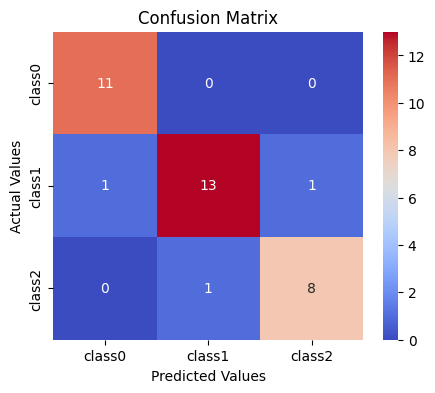

Accuracy: 0.914286
Precision: [0.9166666666666666, 0.9285714285714286, 0.8888888888888888]
F1 Scores: [0.9565217391304348, 0.896551724137931, 0.8888888888888888]


 ---------------- Fold 2 ----------------


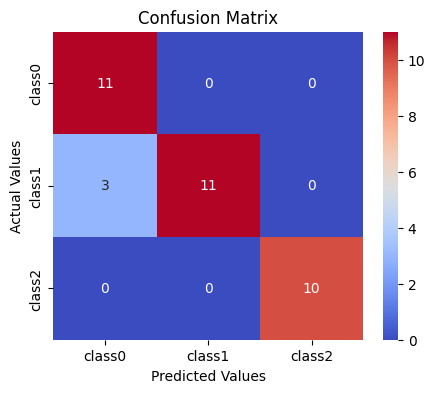

Accuracy: 0.914286
Precision: [0.7857142857142857, 1.0, 1.0]
F1 Scores: [0.88, 0.88, 1.0]


 ---------------- Fold 3 ----------------


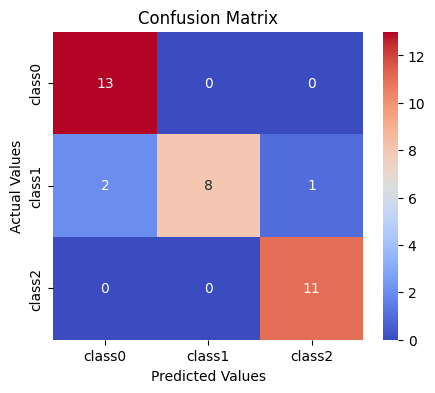

Accuracy: 0.914286
Precision: [0.8666666666666667, 1.0, 0.9166666666666666]
F1 Scores: [0.9285714285714286, 0.8421052631578948, 0.9565217391304348]


 ---------------- Fold 4 ----------------


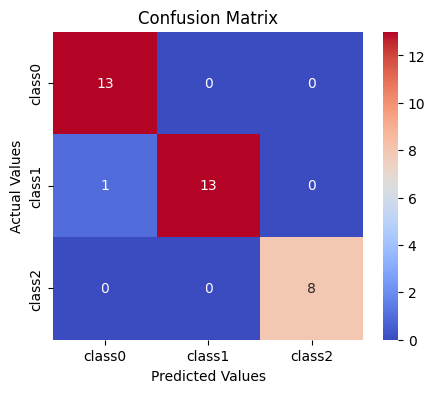

Accuracy: 0.971429
Precision: [0.9285714285714286, 1.0, 1.0]
F1 Scores: [0.962962962962963, 0.962962962962963, 1.0]


 ---------------- Fold 5 ----------------


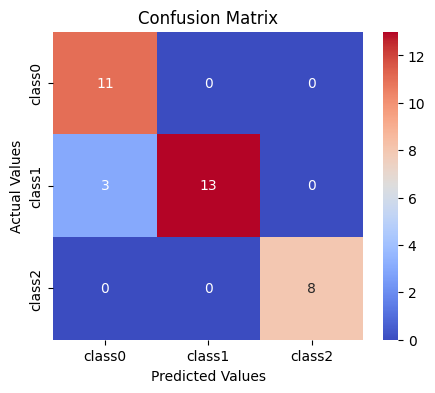

Accuracy: 0.914286
Precision: [0.7857142857142857, 1.0, 1.0]
F1 Scores: [0.88, 0.896551724137931, 1.0]
------------------Noisy DATA----------------


 ---------------- Fold 1 ----------------


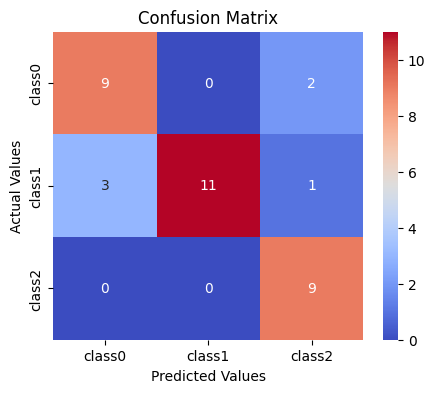

Accuracy: 0.828571
Precision: [0.75, 1.0, 0.75]
F1 Scores: [0.7826086956521738, 0.846153846153846, 0.8571428571428571]


 ---------------- Fold 2 ----------------


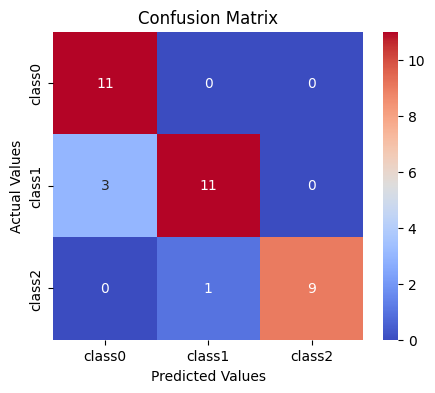

Accuracy: 0.885714
Precision: [0.7857142857142857, 0.9166666666666666, 1.0]
F1 Scores: [0.88, 0.8461538461538461, 0.9473684210526316]


 ---------------- Fold 3 ----------------


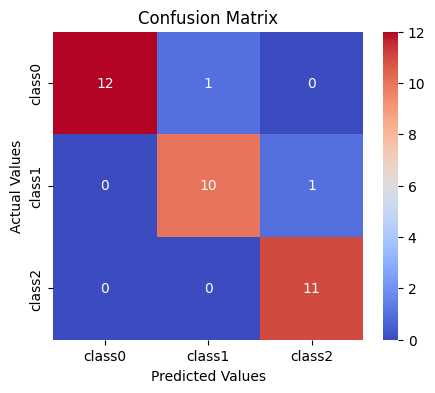

Accuracy: 0.942857
Precision: [1.0, 0.9090909090909091, 0.9166666666666666]
F1 Scores: [0.9600000000000001, 0.9090909090909091, 0.9565217391304348]


 ---------------- Fold 4 ----------------


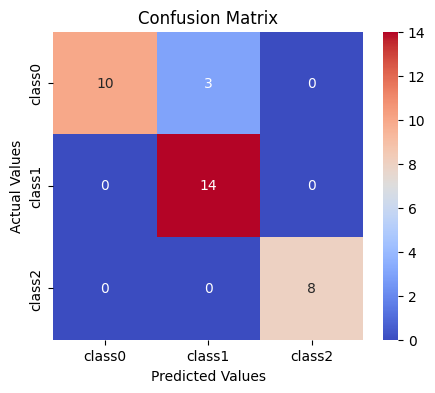

Accuracy: 0.914286
Precision: [1.0, 0.8235294117647058, 1.0]
F1 Scores: [0.8695652173913044, 0.9032258064516129, 1.0]


 ---------------- Fold 5 ----------------


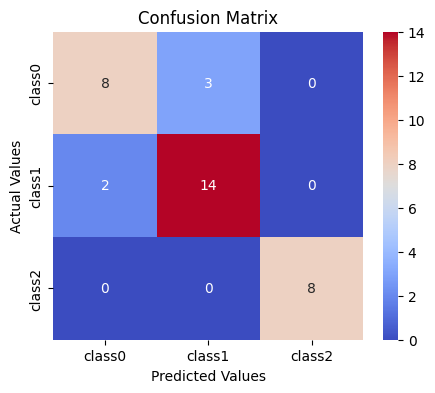

Accuracy: 0.857143
Precision: [0.8, 0.8235294117647058, 1.0]
F1 Scores: [0.761904761904762, 0.8484848484848485, 1.0]


In [299]:


# Print the summaries for clean data
print("------------------CLEAN DATA----------------")
for i in range(len(Clean_fold[0])):
    folds = i + 1
    print("\n\n ---------------- Fold %i ----------------" % folds)
    deployMatrix(Clean_fold[0][i])
    print("Accuracy: %f" % Clean_fold[1][i])
    print("Precision: %s" % Clean_fold[2][i])
    print("F1 Scores: %s" % Clean_fold[3][i])

# Print the summaries for noisy data
print("------------------Noisy DATA----------------")
for i in range(len(Noise_fold[0])):
    folds = i + 1
    print("\n\n ---------------- Fold %i ----------------" % folds)
    deployMatrix(Noise_fold[0][i])
    print("Accuracy: %f" % Noise_fold[1][i])
    print("Precision: %s" % Noise_fold[2][i])
    print("F1 Scores: %s" % Noise_fold[3][i])




## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


**Answer:**
The best params change for noisy data. For comparison, the best parameters are:

The  distance algorithm, the **Manhattan distance**.

The best parameters in any base data should be by default the the one with the a low or none sensitive to the noise. This depends on the total noise present in the real word data.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

**Answer:**

We should employ a ** TIE-BREAKING ** rule, a way to do this is to assign the class label that is closer to the query instante in terms of distance. 




In [300]:
#exmaple 
def breakTie(neighbors):
    """
    Breaks the tie when there are two suggested classes with an even number of neighbors.
    
    Input:
    neighbors: A list of tuples containing the suggested class and the corresponding distance.
    
    Output:
    Returns the class label of the neighbor that is closer in terms of distance.
    """
    # Sort the neighbors based on distance in ascending order
    neighbors.sort(key=lambda x: x[1])
    
    # Get the suggested class labels of the two nearest neighbors
    class1 = neighbors[0][0]
    class2 = neighbors[1][0]
    
    # Break the tie by selecting the class label that is closer in terms of distance
    if class1 < class2:
        return class1
    else:
        return class2


### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


**Answer:**

There is a lot of factor to look at: 

**1. Model Evaluatiol:** define appropriate evaluation metrics to assess the performance of the KNN algorithm like accurancy,presicion,recall,F1 score,etc.

**2.Distance Metric:** Asses the new data and determine the best metric to use, Euclidean and Manhattan  are the common ones, but this will not work on every database.

**3.Handling Class Imbalanc:** If class imbalance appear in the new dataset, we need to use techniques like undersampling to handle the imbalance.

**4. Validation and Testing:** Evaluate the model performance and ensure is good and strong provinding effectiveness when thechnics like cross-validation are used

**5. Data Preparation:** Ensure that the database is prepared and prosecced in a similar way as the wine database.

**6. Choosing the Value of k** Determine the optical value of K. 

**7. Feature Selection** Determine if there is a need to reduce a technique since is import to select the most relevant features to have a good performance 
